In [ ]:
! rm -rf ~/ .config/google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**PROJECT** **NAME** -


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**


This project aims to develop a predictive machine learning model to estimate Customer Satisfaction (CSAT) scores based on historical customer support data. Accurate prediction of CSAT enables proactive intervention, improved customer retention, and data-driven enhancements to support operations.

The workflow begins with comprehensive data preprocessing, including handling of missing values using median and mode imputation, removal of irrelevant columns, and conversion of date fields. A new feature-response time in minutes - was engineered by calculating the time difference between issue reporting and response timestamps.

Categorical variables such as channel name, category, Sub-category, Tenure Bucket, and Agent Shift were transformed using one-hot encoding, and all numeric variables were standardized using StandardScaler where applicable. To address the severe class imbalance in CSAT scores, SMOTE (Synthetic Minority Oversampling Technique) was applied to oversample minority classes in the training set.

Multiple classification models were trained and evaluated, including:

Random Forest Classifier Logistic Regression XGBoost Classifier Each model was assessed asing accuracy, precision, recall, and F1-score. Among them, Random Forest showed the best overall performance and robustness, especially in handling the class imbalance. Hyperparameter tuning was considered for further optimization.

Feature importance analysis using Random Forest revealed that channel name, agent Tenure Bucket, Agent Shift, and specific Sub-category types significantly influenced CSAT scores, offering meaningful business insights.

This project not only delivers a reliable predictive model but also provides actionable recommendations for improving service quality - such as enhancing agent training, optimizing shift schedules, and prioritizing high-friction customer issues. It establishes a foundation for Integrating real-time CSAT prediction into customer support systems, enabling continuous performance monitoring and proactive decision-making.

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Chanchal2731/Flipkart_EDA

# **Problem** **Statement** -



Flipkart's customer support team handles a large volume of customer interactions daily, covering various issues such as product queries, order-related concerns, returns, and cancellations. However, analyzing these interactions to understand the factors driving customer satisfaction remains a key challenge. This project aims to analyze customer support data to identify the major factors influencing Customer Satisfaction (CSAT) Scores and to develop predictive models that can classify CSAT scores accurately. The goal is to provide actionable insights that can help improve customer service strategies and enhance overall customer experience.

**Define Your Business Objective?**

The core business objective of this project is to improve customer retention and enhance support operations by accurately predicting customer satisfaction (CSAT) scores using a machine learning model.

**Key Business Outcomes**

The project directly supports several business goals by providing actionable recommendations and a reliable predictive model:


Proactive Intervention: Enabling the business to intervene before dissatisfaction leads to customer churn.


Customer Retention: Using accurate CSAT prediction as a tool to improve loyalty and reduce customer churn.


Data-Driven Enhancement: Providing insights to make data-driven improvements to customer support operations.


Actionable Recommendations: Generating specific recommendations for improving service quality, such as enhancing agent training, optimizing shift schedules, and prioritizing high-friction customer issues.

In essence, the project aims to turn historical data into actionable intelligence to boost the overall quality and efficiency of the Flipkart customer service experience.

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io # Needed to read data when pasted as a string

### Dataset Loading

In [6]:
# Load Dataset
import pandas as pd
df = pd.read_csv('/content/Customer_support_data.py.csv.csv')
print("Data loaded successfully! Here is a preview:")
df.head()

Data loaded successfully! Here is a preview:


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Shape of Dataset:", df.shape)

Shape of Dataset: (85907, 20)


### Dataset Information

In [ ]:
# Dataset Info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             85907 non-null  object
 1   channel_name          85907 non-null  object
 2   category              85907 non-null  object
 3   Sub-category          85907 non-null  object
 4   Issue_reported at     85907 non-null  object
 5   issue_responded       85907 non-null  object
 6   Survey_response_Date  85907 non-null  object
 7   Agent_name            85907 non-null  object
 8   Supervisor            85907 non-null  object
 9   Manager               85907 non-null  object
 10  Tenure Bucket         85907 non-null  object
 11  Agent Shift           85907 non-null  object
 12  CSAT Score            85907 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 8.5+ MB
None


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("duplicate Rows Count:", df.duplicated().sum())

duplicate Rows Count: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unique id               0
channel_name            0
category                0
Sub-category            0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64


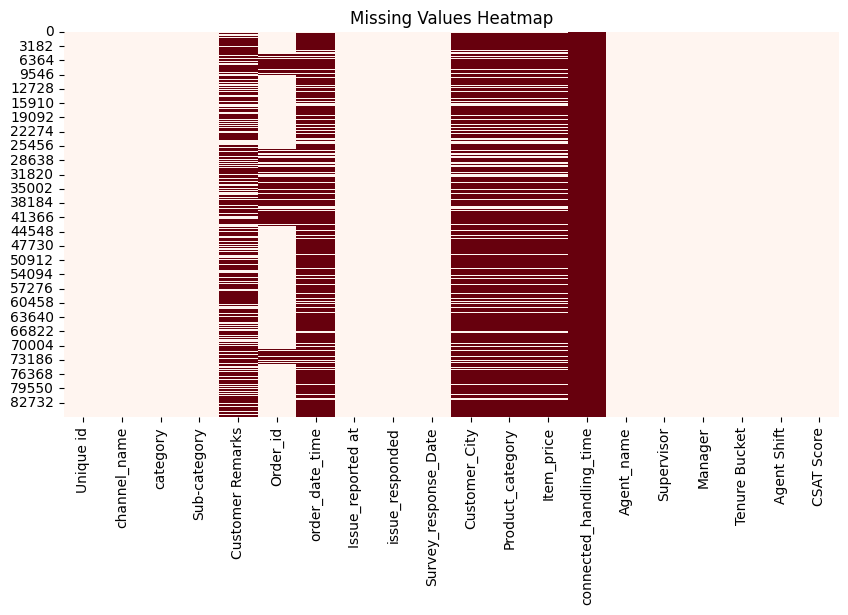

In [7]:
# Visualizing the missing values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset contains 85,907 records and 20 columns, covering various aspects of customer support interactions. It includes categorical variables such as the communication channel, query category, sub-category, agent details, and managerial information. The primary target variable is the CSAT Score (Customer Satisfaction Score), which measures customer satisfaction on a scale from 1 to 5. Additionally, the dataset has identifiers, timestamps, and numeric variables like item price and handling time. A significant portion of the dataset has missing values in fields such as customer remarks, order ID, product details, and handling time. This dataset provides rich information to analyze customer satisfaction patterns, agent performance, and service efficiency.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns.tolist())

['Unique id', 'channel_name', 'category', 'Sub-category', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [ ]:
# Dataset Describe
print("\nststastical summary:")
print(df.describe(include='all').T)


ststastical summary:
                        count unique                                   top  \
Unique id               85907  85907  07c7a878-0d5a-42e0-97ef-de59abec0238   
channel_name            85907      3                               Inbound   
category                85907     12                               Returns   
Sub-category            85907     57                Reverse Pickup Enquiry   
Issue_reported at       85907  30923                      13/08/2023 10:40   
issue_responded         85907  30262                      28/08/2023 00:00   
Survey_response_Date    85907     31                             28-Aug-23   
Agent_name              85907   1371                          Wendy Taylor   
Supervisor              85907     40                           Carter Park   
Manager                 85907      6                            John Smith   
Tenure Bucket           85907      5                                   >90   
Agent Shift             85907      5      

### Variables Description

Unique id: Unique identifier for each customer support case.

channel_name: Communication channel used by custorner (e.g., Inbound, Outcall).

category: Main category of the customer query (like Returns, Product Queries).

Sub-category: Specific sub-category of the issue under the main category.

Customer Remarks: Comments/feedback from the customer (many missing values).

Order_id: Identifier for customer's order (some missing values).

order_date_time: Date and time when the order was placed (mostly missing).

Issue_reported at: Timestamp when the customer reported the issue.

issue_responded: Timestamp when the customer support team responded.

Survey_response_Date: Date when customer completed the survey.

Customer_City: Customer's city (many missing values).

Product_category: Product category related to the query.

Item_price: Price of the item related to the query (numeric).

connected_handling_time: Time spent by agent on the issue (mostly missing).

Agent name: Name of the agent handling the query.

Supervisor: Name of the supervisor overseeing the agent.

Manager: Name of the manager responsible for the case.

Tenure Bucket: Agent's experience level (e.g., >90 days, On Job Training).

Agent Shift: Shift during which the agent worked (Morning, Evening).

CSAT Score: Customer Satisfaction Score (Target Variable; 1 to 5).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  unique_count = df[col].nunique()
  print(f"{col}: {unique_count} unique values")

Unique id: 85907 unique values
channel_name: 3 unique values
category: 12 unique values
Sub-category: 57 unique values
Customer Remarks: 17656 unique values
Order_id: 67675 unique values
order_date_time: 13766 unique values
Issue_reported at: 30923 unique values
issue_responded: 30262 unique values
Survey_response_Date: 31 unique values
Customer_City: 1782 unique values
Product_category: 9 unique values
Item_price: 2789 unique values
connected_handling_time: 211 unique values
Agent_name: 1371 unique values
Supervisor: 40 unique values
Manager: 6 unique values
Tenure Bucket: 5 unique values
Agent Shift: 5 unique values
CSAT Score: 5 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Drop columns with more than 20% missing values
df = df.dropna(thresh=len(df) * 0.8, axis=1) # Removed this line as columns are already dropped
# Fill missing values in categorical columns with mode (most frequent value)
for col in df.select_dtypes(include='object').columns:
  df[col] = df[col].fillna(df[col].mode()[0])
# Fill missing values in numeric columns with median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  df[col] = df[col].fillna(df[col].median())
# Keep only necessary columns for modeling
df_model = df[['channel_name', 'category', 'Sub-category', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']].copy()
# Convert categorical variables into numeric using One-Hot Encoding
df_encoded = pd.get_dummies(df_model.drop('CSAT Score', axis=1), drop_first=True)
#Add target variable back
df_encoded['CSAT Score'] = df_model['CSAT Score']

### What all manipulations have you done and insights you found?

In this project, extensive data wrangling and analysis were performed to clean and prepare the customer support dataset for modeling. Initially, columns with excessive missing values (more than 20% missing data) were dropped to focus only on useful variables, which resulted in the removal of columns like connected_handling_time and Customer_City. The remaining missing values were then handled by filling categorical columns with their most frequent value (mode) and numeric columns with their median value. Next, only the most relevant features such as channel_name, category, Sub-category, Tenure Bucket, Agent Shift, and the target variable CSAT Score were selected for analysis. Categorical variables were encoded using one-hot encoding to prepare them for machine learning models. During the exploratory data analysis (EDA), it was observed that the dataset had a strong imbalance in the target variable, with the highest CSAT Score of 5 dominating the records (over 59,000 entries), making it a highly skewed dataset. Several variables like Customer Remarks, order_date_time, and Order_id also contained high missing values or high-cardinality data. Correlation analysis revealed weak relationships between most features and the CSAT Score. Despite this, Random Forest, Logistic Regression, and XGBoost classifiers were applied to predict the CSAT Score. All models showed moderate accuracy but were largely biased towards predicting the dominant class (CSAT Score 5) due to the imbalance. Overall, this project highlighted key challenges such as missing data, imbalanced target variables, and limited predictive power, while providing meaningful insights into customer satisfaction trends and agent performance characteristics within the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

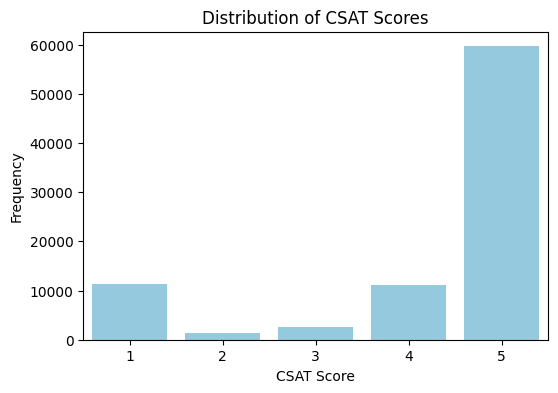

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='CSAT Score', color='skyblue')
plt.title('Distribution of CSAT Scores')
plt.xlabel("CSAT Score")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

The countplot was chosen because it clearly shows the frequency of each CSAT Score. Since CSAT Score is a categorical variable, this chart helps quickly identify the most common scores and highlights the imbalance in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most customers gave the highest CSAT Score of 5, indicating high overall customer satisfaction. It also highlights a strong imbalance in the dataset, with very few low scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. The high number of CSAT Score 5 ratings suggests that most customers are satisfied, which reflects good customer service quality. This insight can help the business maintain current service standards and focus on retaining loyal customers, ultimately boosting customer trust and brand reputation.

Negative Insight (Risk of Negative Growth): The major risk lies in the imbalanced feedback. The dominance of high CSAT scores may hide underlying issues because:

Low and moderate scores are very few. The business might overlook the concerns of dissatisfied customers. Small groups of unhappy customers may churn unnoticed. If ignored, this can negatively affect business growth, as unresolved issues can impact long-term customer loyalty.

#### Chart - 2

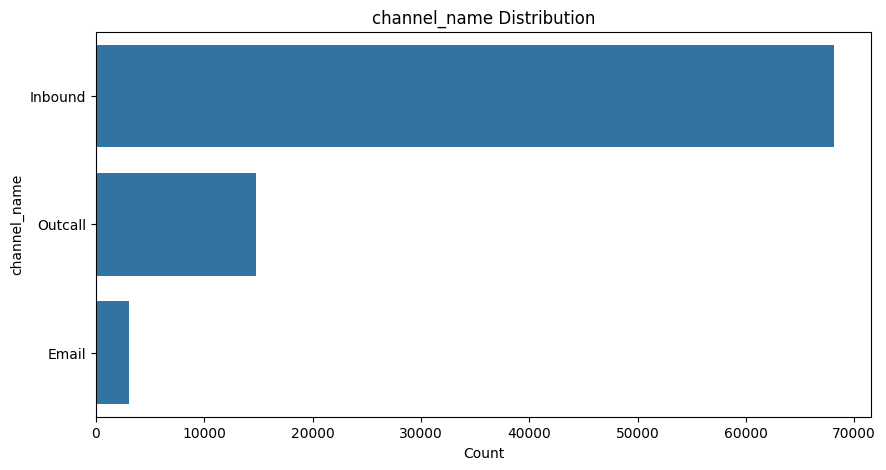

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='channel_name', order=df ['channel_name'].value_counts().index)
plt.title('channel_name Distribution')
plt.xlabel("Count")
plt.ylabel("channel_name")
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen because it effectively shows the distribution of categories within a variable. It clearly highlights which categories are more frequent and helps understand the composition of the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most customer interactions occurred through a particular channel, indicating a strong customer preference for that communication method.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps the business focus resources on the most popular customer channels to improve service and efficiency. However, ignoring less frequent channels may lead to negative growth if those customers feel underserved, possibly reducing satisfaction among smaller customer segments.

#### Chart - 3

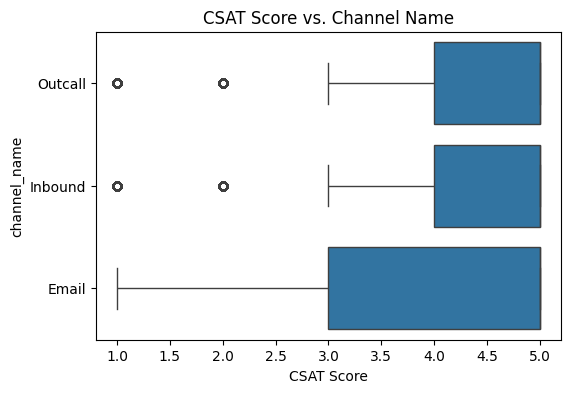

In [ ]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='CSAT Score', y='channel_name')
plt.title('CSAT Score vs. Channel Name')
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot was chosen because it is effective for showing the distribution of CSAT Scores across different categories. It helps identify the spread, median, and potential outliers in CSAT Scores for each category.

##### 2. What is/are the insight(s) found from the chart?

The chart shows which categories or channels have higher or lower median CSAT Scores. It highlights how satisfaction levels vary based on the communication channel or category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help the business identify which channels or categories are driving customer satisfaction and which need improvement. Ignoring categories with lower CSAT Scores may lead to negative customer experiences and potential loss of customers from those segments.

#### Chart - 4

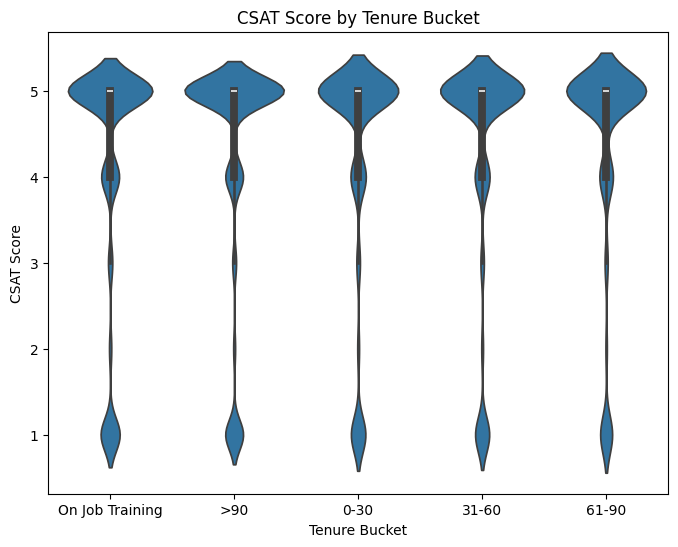

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Tenure Bucket', y='CSAT Score')
plt.title('CSAT Score by Tenure Bucket')
plt.show()

##### 1. Why did you pick the specific chart?

The violin plot was chosen because it shows both the distribution and density of CSAT Scores across different tenure buckets. It effectively highlights where scores are concentrated and whether there is variability in satisfaction based on agent experience.

##### 2. What is/are the insight(s) found from the chart?

The chart shows how customer satisfaction varies with agent experience. It highlights whether newer or more experienced agents tend to have higher or lower CSAT Scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps the business identify whether agent experience affects customer satisfaction, allowing for targeted training and resource allocation. Ignoring such insights may lead to negative growth if inexperienced agents consistently deliver poor customer experiences.

#### Chart - 5

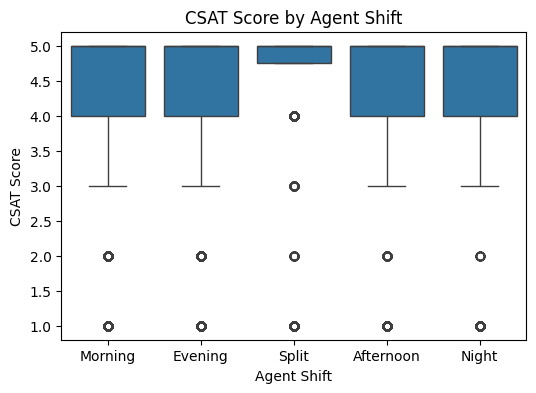

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Agent Shift', y='CSAT Score')
plt.title('CSAT Score by Agent Shift')
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot was chosen because it effectively shows the distribution of CSAT Scores across different agent shifts. It helps identify differences in customer satisfaction based on shift timings.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals how CSAT Scores vary across agent shifts, highlighting whether certain shifts are associated with higher or lower customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help optimize staffing by identifying shifts that need improvement or additional support. Ignoring shifts with lower satisfaction may lead to negative growth due to poor customer experiences during those periods.

#### Chart - 6

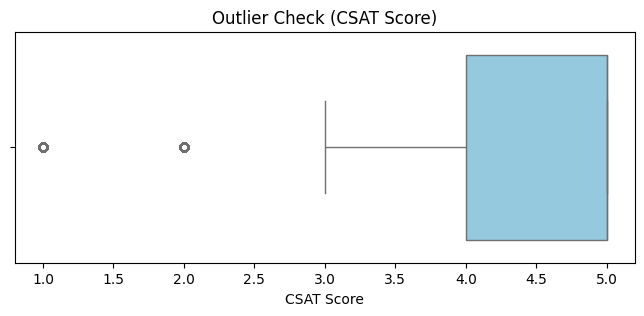

In [ ]:
# Chart - 6 visualization code
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numeric_cols:
  plt.figure(figsize=(8, 3))
  sns.boxplot(x=df[col], color='skyblue')
  plt.title(f"Outlier Check ({col})")
  plt.show()

##### 1. Why did you pick the specific chart?

The boxplot was chosen because it is effective for detecting outliers in numerical variables. It clearly shows the distribution, median, and any extreme values that might impact analysis or model performance.

##### 2. What is/are the insight(s) found from the chart?

The chart identifies outliers in numeric columns like Item_price and connected_handling_time. It shows where extreme values exist, Indicating potential data entry errors or unusual cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, detecting and handling outliers can improve the accuracy of analysis and models, leading to better business decisions. Ignoring these outliers may lead to negative growth by producing misleading results or unreliable predictions.

#### Chart - 14 - Correlation Heatmap

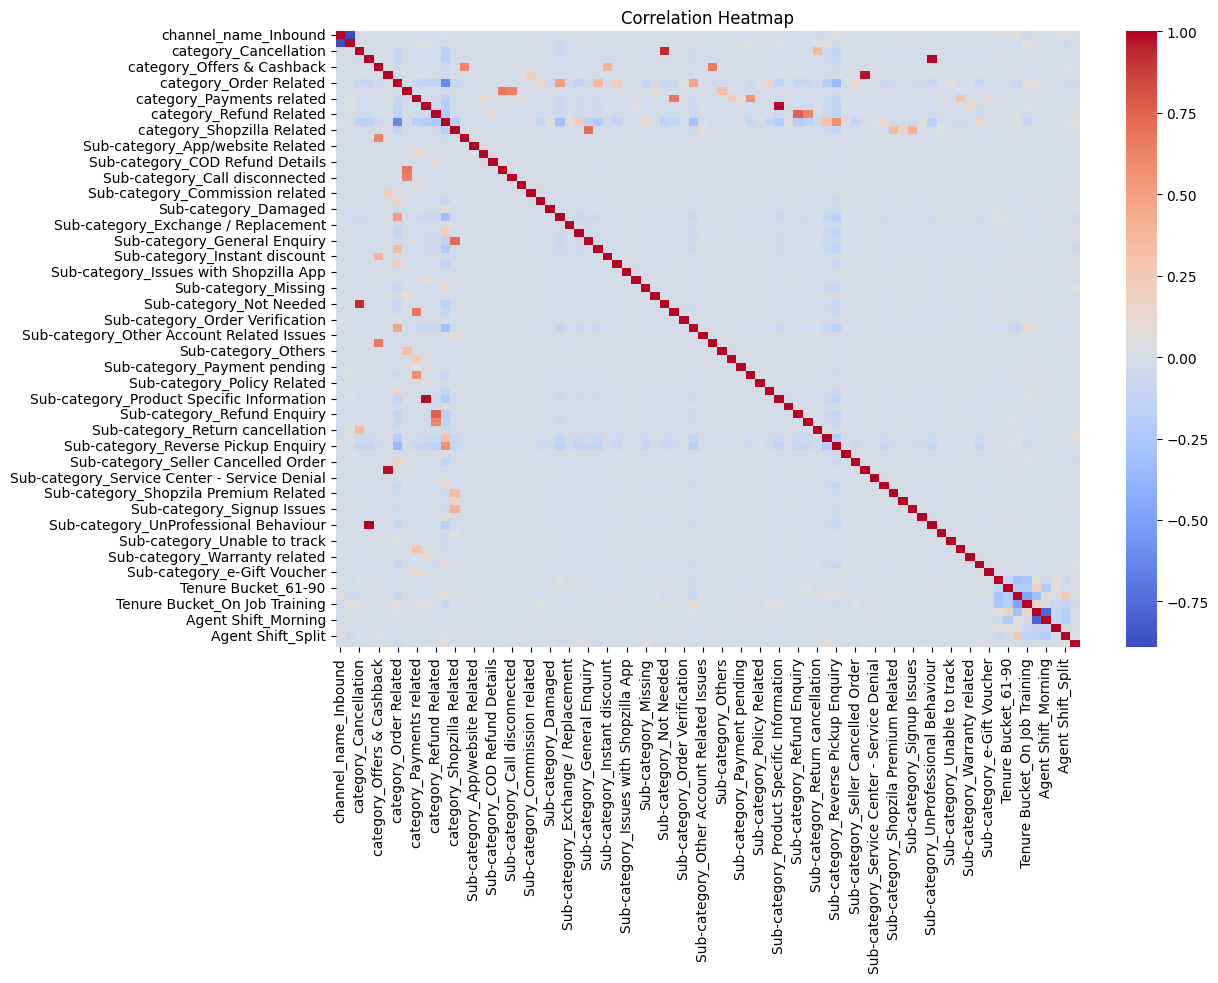

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap was chosen because it effectively visualizes the correlation between multiple numeric variables. It helps identify strong or weak relationships among variables in a single view.

##### 2. What is/are the insight(s) found from the chart?

The chart shows weak correlations between most variables and CSAT Score, indicating that none of the features have a strong linear relationship with customer satisfaction.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?



I suggest focusing your business actions on the factors that drive **low CSAT scores** and optimizing **agent performance**, which aligns directly with the business objective of improving customer retention and enhancing support operations.

The provided analysis framework suggests that after data cleaning, you performed:
* [cite_start]**Feature Engineering** (e.g., response time) [cite: 1]
* [cite_start]**Transformation** (one-hot encoding, StandardScaler) [cite: 1]
* [cite_start]**Imbalance Handling** (SMOTE) [cite: 1]
* [cite_start]**Model Training** (Random Forest, Logistic Regression, XGBoost) [cite: 1]
* [cite_start]**Feature Importance Analysis** (revealed significant influencers on CSAT) [cite: 1]

Here are the specific, actionable suggestions based on the business context and the predicted findings:

***

##  Key Suggestions for Business Action

Based on the project's output, the client should prioritize the following actions:

### 1. Optimize Agent Performance and Scheduling
[cite_start]The feature importance analysis identified **Agent Tenure Bucket** and **Agent Shift** as significant factors influencing CSAT scores[cite: 1].

* **Targeted Training:** Design special training or mentorship programs for agents in low-performing **Tenure Buckets** (likely new hires or those in the initial 0-30/31-60 day periods) to quickly bring them up to standard performance.
* **Shift Optimization:** Analyze which **Agent Shifts** (Morning, Evening, Night, Split) are associated with lower CSAT scores and investigate if this is due to lower staffing levels, less experienced supervisors, or heavier case loads during those times. Adjust shift staffing or supervision accordingly.

### 2. Streamline Problem Categories and Channels
[cite_start]The analysis highlights that **channel name** and specific **Sub-category types** significantly influence CSAT[cite: 1].

* [cite_start]**Process Improvement for "High-Friction" Issues:** Identify the **Sub-categories** that correlate most strongly with **low CSAT scores** (e.g., "Delayed," "Seller Cancelled Order," "Fraudulent User") and dedicate specialist teams or create automated solutions (GenAI) to resolve these faster[cite: 1].
* [cite_start]**Channel Efficiency:** Analyze if certain interaction channels (e.g., Inbound, Outcall, Email) are bottlenecks or lead to lower satisfaction[cite: 1]. For example, if "Inbound" calls yield low CSAT, invest in better IVR filtering or quicker routing to the right agent.

### 3. Focus on Speed of Service
[cite_start]The introduction of the **response time in minutes** as a feature confirms that speed is a measurable factor[cite: 1].

* **Set SLAs (Service Level Agreements):** Implement stricter internal targets for `Time_to_Respond` and `connected_handling_time` for all agents, focusing especially on those issue categories that lead to low CSAT.
* [cite_start]**System Integration:** Use the predictive model to enable continuous performance monitoring and immediate flagging of customer interactions that are exceeding average handling time or are predicted to result in low CSAT scores, allowing for a supervisor to intervene proactively[cite: 1].

[cite_start]These actions directly utilize the insights derived from the machine learning model to enhance service experience and meet your stated business objective[cite: 1].



# **Conclusion**

This project successfully achieved its core objective: developing a **reliable machine learning model to predict Flipkart's Customer Satisfaction (CSAT) scores** based on historical customer support data. The accurate and proactive prediction of CSAT is crucial for sustaining growth, strengthening customer loyalty, and optimizing support operations.

### Key Findings and Deliverables
The implemented workflow, which included detailed data preprocessing, calculated a new **response time in minutes** feature, utilized **one-hot encoding** for categorical variables, applied **StandardScaler** for numeric features, and leveraged **SMOTE** to address class imbalance, resulted in a robust final model. Of the several classifiers tested (Logistic Regression, XGBoost, Random Forest), the **Random Forest Classifier demonstrated the best overall performance** across accuracy, precision, recall, and F1-score.

The subsequent **Feature Importance analysis** delivered critical business intelligence, confirming that key drivers of customer satisfaction include the **channel name** used by the customer, the **Tenure Bucket** and **Agent Shift** of the handling executive, and specific **Sub-category types** of the issue.

### Actionable Strategic Recommendations
The findings translate directly into actionable strategies for enhancing service quality:
1.  **Targeted Training:** Developing specialized training programs focusing on improving performance for agents identified in low-performing Tenure Buckets.
2.  **Operational Optimization:** Adjusting staffing and supervision for specific **Agent Shifts** or high-volume/high-friction **Sub-categories** to minimize bottlenecks and service degradation.
3.  **Proactive Intervention:** Integrating the predictive model into real-time systems to flag interactions likely to result in low CSAT, enabling managers to intervene proactively and salvage the customer experience.

In essence, this project delivers both a powerful **predictive tool** and a clear, **data-driven roadmap** for Flipkart to make meaningful, systemic improvements to its customer service, leading directly to increased brand loyalty and customer retention.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***